<a href="https://colab.research.google.com/github/AlbertMdz/Optimizacion-Evolutiva/blob/master/Evoluci%C3%B3ndiferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de evaluación: 1
[[  8.5  -3. ]
 [  1.5  11. ]
 [ -3.   15. ]
 [ 12.   20. ]
 [ 10.    7. ]
 [-12.5  21.5]
 [ -8.   -9. ]
 [ -2.    3. ]
 [ -2.   -5. ]
 [ -3.  -10.5]
 [  3.    2. ]
 [  1.  -16. ]
 [ -4.  -10. ]
 [  4.5  -6. ]
 [ -2.  -19.5]
 [  1.   -5. ]
 [ 19.   -7. ]
 [ -2.   -5. ]
 [  1.   19. ]
 [ -2.    7. ]
 [  6.  -15. ]
 [ 10.   12. ]
 [ -1.    6. ]
 [ 16.   -7. ]
 [-10.  -12. ]
 [ -2.   -1. ]
 [  8.   12. ]
 [ -1.    9. ]
 [-11.  -11. ]
 [  6.5  13.5]
 [  8.    1. ]
 [  8.  -17. ]
 [ 15.   24. ]
 [ -2.   -9.5]
 [  2.    2. ]
 [ 14.   -6. ]
 [  0.5 -19.5]
 [  1.   -9. ]
 [  6.   12. ]
 [ -4.   16. ]]
Número de evaluación: 2
[[ -6.25   3.  ]
 [  1.5   11.  ]
 [ -3.    15.  ]
 [  2.     0.75]
 [ 10.    26.25]
 [ 10.5    2.75]
 [  5.    25.  ]
 [ -2.     3.  ]
 [  2.5   11.  ]
 [ -3.   -10.5 ]
 [  3.     2.  ]
 [  1.   -16.  ]
 [ -2.75   5.5 ]
 [  4.5   -6.  ]
 [ -2.   -19.5 ]
 [  1.    -5.  ]
 [ -3.     9.  ]
 [ -2.    -5.  ]
 [  1.   -14.  ]
 [ -2.     7.  ]
 [  6.   -1

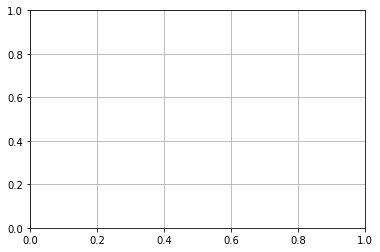

In [5]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math

def main():
    Np = 40 # individuos
    D = 2
    Cr = 0.9 #Probabilidad de ser mutado 
    F = 0.5  #Operador de cruzamiento

    VectorV = np.empty((Np, D))
    VectorU = np.empty((Np, D))

   
    for i in range(Np):
        for j in range(2):
            VectorV[i][j] = rand.randint(-20, 20)

    plt.ion()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(True)
            
    NumEvaluaciones = 0
    while(NumEvaluaciones < 100):
        for i in range(Np):
            r0 = i
            while(r0 == i):
                r0 = math.floor(rand.random() * Np)
            r1 = r0
            while(r1 == r0 or r1 == i):
                r1 = math.floor(rand.random() * Np)
            r2 = r1
            while(r2 == r1 or r2 == r0 or r2 == i):
                r2 = math.floor(rand.random() * Np)
                
            jrand = math.floor(rand.random() * D)
            
            for j in range(D):
                if (rand.random() <= Cr or j == jrand):
                    #Mutación
                    VectorU[i][j] = VectorV[r0][j] + F * (VectorV[r1][j] - VectorV[r2][j])
                else:
                    VectorU[i][j] = VectorV[i][j]

        for k in range(Np):
            if fitness(VectorU[k][0], VectorU[k][1]) < fitness(VectorV[k][0], VectorV[k][1]):
                VectorV[k][0] = VectorU[k][0]
                VectorV[k][1] = VectorU[k][1]

        line1 = ax.plot(VectorU[:, 0], VectorU[:, 1],'b+')
        line2 = ax.plot(VectorV[:, 0], VectorV[:, 1],'g*')

        ax.set_xlim(-10, 20)
        ax.set_ylim(-10, 20)
        
        fig.canvas.draw()

        ax.clear()
        ax.grid(True)
        
        NumEvaluaciones += 1

        print ('Número de evaluación: ' + str(NumEvaluaciones))
        print (VectorV)

    

def fitness(x, y):
    #Rosenbrock 
    return 100 * ((y - (x**2))**2) + ((1 - (x**2))**2)

if '__main__' == main():
    main()